In [4]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from env import Connect4env
import sys
from collections import defaultdict
import gym
from agents import SarsaLambda,QLearning

env=Connect4env()
s,l=env.reset()

In [5]:
max_eps=50000

def train_agents_sarsa(env:Connect4env,agent1:SarsaLambda,agent2:SarsaLambda,max_episodes:int):

    full_rewards={1:[0],2:[0],0:[0]}
    full_rewards_post={1:[0],2:[0],0:[0]}
    for ep in range(max_episodes):

        agent1.reset() # reset the traces and update the epsilons
        agent2.reset()
        
        state,legal_moves=env.reset()
        winner=-1
        while winner==-1:
            if legal_moves ==[]:
                break

        
            player=env.current_player

            current_agent=agent2 if player==2 else agent1

            action = current_agent.select_action(state, legal_moves)
            next_state, rewards, legal_moves, winner = env.step(action)

            reward=rewards[player]
            current_agent.step(next_state,reward,winner)

            state=next_state

        #for p in [1, 2]:
            #full_rewards[p].append(full_rewards[p][-1] + rewards[p])
        if ep <5000:
            for players in [1,2,0]:
                if players==winner:
                    full_rewards[players].append(full_rewards[players][-1]+1) 
                else:
                    if players==0:
                        full_rewards[players].append(full_rewards[players][-1])
                    else:
                        full_rewards[players].append(full_rewards[players][-1]-1)

        if ep >45000:
            for players in [1,2,0]:
                if players==winner:
                    full_rewards_post[players].append(full_rewards_post[players][-1]+1) 
                else:
                    if players==0:
                        full_rewards_post[players].append(full_rewards_post[players][-1])
                    else:
                        full_rewards_post[players].append(full_rewards_post[players][-1]-1)

        if ep % 1000 == 0:
            print("\rEpisode {}/{}.".format(ep, max_episodes), end="")
            sys.stdout.flush()
        
    return full_rewards,full_rewards_post
        

In [6]:
agent1=SarsaLambda(env,epsilon=1,eps_decay=0.9999,gamma=1,alpha=0.02,lambd=0.8)
agent2=SarsaLambda(env,epsilon=1,eps_decay=0.9999,gamma=1,alpha=0.02,lambd=0.8)

rewards_evolution,rewards_evolution_post=train_agents_sarsa(env,agent1,agent2,max_episodes=50000)

Episode 49000/50000.

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/var/folders/wx/4x9m6jk95j3cdy5clx5kfb3w0000gn/T/ipykernel_3130/3148717188.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.title("SARSA($\lambda$) agents for the first 5000 games")


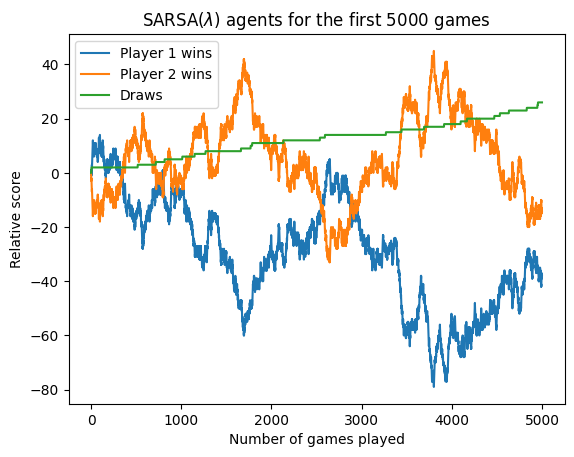

In [7]:
plt.plot(rewards_evolution[1],label="Player 1 wins")
plt.plot(rewards_evolution[2],label="Player 2 wins")
plt.plot(rewards_evolution[0],label="Draws")
plt.xlabel("Number of games played")
plt.ylabel("Relative score")
plt.title("SARSA($\lambda$) agents for the first 5000 games")
plt.legend()

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/var/folders/wx/4x9m6jk95j3cdy5clx5kfb3w0000gn/T/ipykernel_3130/962665781.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.title("SARSA($\lambda$) agents for the last 5000 games")


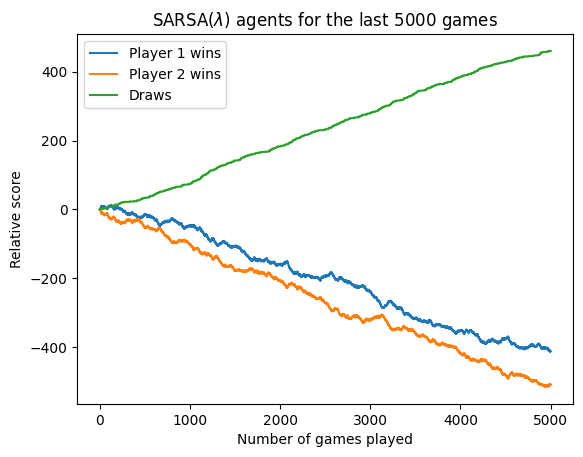

In [8]:
plt.plot(rewards_evolution_post[1],label="Player 1 wins")
plt.plot(rewards_evolution_post[2],label="Player 2 wins")
plt.plot(rewards_evolution_post[0],label="Draws")
plt.xlabel("Number of games played")
plt.ylabel("Relative score")
plt.title("SARSA($\lambda$) agents for the last 5000 games")
plt.legend()

In [15]:
agent1.reset() 
agent2.reset()

state,legal_moves=env.reset()
winner=-1
while winner==-1:
    if legal_moves ==[]:
        break


    player=env.current_player

    current_agent=agent2 if player==2 else agent1

    action = current_agent.select_action(state, legal_moves)
    next_state, rewards, legal_moves, winner = env.step(action)
    print(env.board)
    reward=rewards[player]
    #current_agent.step(next_state,reward,winner)

    state=next_state

[[2 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 1 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 1 2 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 1 2 1 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 1 2 1 2]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 1 2 1 2]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 1 2 1 2]
 [1 2 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[2 2 1 2 1 2]
 [1 2 1 0 0 0]
 [1 0 0 0 0 0]
 

In [16]:
def longest_chain(grid):
    rows, cols = grid.shape
    longest_p1 = 0
    longest_p2 = 0

    def max_streak(lst, player):
        max_count = 0
        count = 0
        for val in lst:
            if val == player:
                count += 1
                max_count = max(max_count, count)
            else:
                count = 0
        return max_count

    for row in grid:
        longest_p1 = max(longest_p1, max_streak(row, 1))
        longest_p2 = max(longest_p2, max_streak(row, 2))

    for col in range(cols):
        longest_p1 = max(longest_p1, max_streak(grid[:, col], 1))
        longest_p2 = max(longest_p2, max_streak(grid[:, col], 2))


    for d in range(-rows + 1, cols):
        diag = np.diagonal(grid, offset=d)
        longest_p1 = max(longest_p1, max_streak(diag, 1))
        longest_p2 = max(longest_p2, max_streak(diag, 2))

    flipped_grid = np.fliplr(grid)
    for d in range(-rows + 1, cols):
        diag = np.diagonal(flipped_grid, offset=d)
        longest_p1 = max(longest_p1, max_streak(diag, 1))
        longest_p2 = max(longest_p2, max_streak(diag, 2))

    return {1:longest_p1, 2:longest_p2}

In [17]:
longest_chain(env.board)

{1: 4, 2: 3}